This notebook is to see the Microbusiness Acyivity Index for each  county and State.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# pd.set_option('display.max_rows', None)

In [ ]:
# !unzip "/content/drive/MyDrive/Capstone/Data/Microbusiness_Activity_index.zip" -d "/content/drive/MyDrive/Capstone/Microbusiness_Activity_Index"

In [ ]:
mai = pd.read_csv('/content/drive/MyDrive/Capstone/Microbusiness_Activity_Index/VF_mai_states_Q222.csv') 
mai.head()

,date,fips,state_abbrev,state_name,total_pop_20,MAI_composite,engagement,participation,infrastructure
0,01apr2020,1,AL,Alabama,5024279,95.15,99.00,96.98,91.83
1,01apr2020,2,AK,Alaska,733391,102.11,99.50,100.37,107.39
2,01apr2020,4,AZ,Arizona,7151502,101.63,96.97,103.28,100.54
3,01apr2020,5,AR,Arkansas,3011524,95.37,100.38,97.31,90.01
4,01apr2020,6,CA,California,39538224,102.05,97.40,102.93,102.54


Dropping cfips and total_pop_20 column


In [ ]:
mai.shape

(1377, 9)

In [ ]:
mai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1377 non-null   object 
 1   fips            1377 non-null   int64  
 2   state_abbrev    1377 non-null   object 
 3   state_name      1377 non-null   object 
 4   total_pop_20    1377 non-null   int64  
 5   MAI_composite   1377 non-null   float64
 6   engagement      1377 non-null   float64
 7   participation   1377 non-null   float64
 8   infrastructure  1377 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 96.9+ KB


In [ ]:
mai_df = mai.drop(columns=['fips', "state_abbrev"])

In [ ]:
mai_df.head()

,date,state_name,total_pop_20,MAI_composite,engagement,participation,infrastructure
0,01apr2020,Alabama,5024279,95.15,99.00,96.98,91.83
1,01apr2020,Alaska,733391,102.11,99.50,100.37,107.39
2,01apr2020,Arizona,7151502,101.63,96.97,103.28,100.54
3,01apr2020,Arkansas,3011524,95.37,100.38,97.31,90.01
4,01apr2020,California,39538224,102.05,97.40,102.93,102.54


In [ ]:
mai_df.tail()

,date,state_name,total_pop_20,MAI_composite,engagement,participation,infrastructure
1372,01jun2022,Virginia,8631393,107.74,112.99,101.96,106.87
1373,01jun2022,Washington,7705281,106.67,109.17,101.71,108.37
1374,01jun2022,West Virginia,1793716,100.01,111.54,97.37,93.05
1375,01jun2022,Wisconsin,5893718,105.73,116.54,99.64,101.56
1376,01jun2022,Wyoming,576851,106.56,113.70,101.11,104.01


In [ ]:
mai_df.date.value_counts()

01apr2020    51
01jun2021    51
01may2022    51
01apr2022    51
01mar2022    51
01feb2022    51
01jan2022    51
01dec2021    51
01nov2021    51
01oct2021    51
01sep2021    51
01aug2021    51
01jul2021    51
01may2021    51
01may2020    51
01apr2021    51
01mar2021    51
01feb2021    51
01jan2021    51
01dec2020    51
01nov2020    51
01oct2020    51
01sep2020    51
01aug2020    51
01jul2020    51
01jun2020    51
01jun2022    51
Name: date, dtype: int64

In [ ]:
mai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1377 non-null   object 
 1   state_name      1377 non-null   object 
 2   total_pop_20    1377 non-null   int64  
 3   MAI_composite   1377 non-null   float64
 4   engagement      1377 non-null   float64
 5   participation   1377 non-null   float64
 6   infrastructure  1377 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 75.4+ KB


In [ ]:
mai_df['date']= pd.to_datetime(mai_df['date'])

In [ ]:
mai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1377 non-null   datetime64[ns]
 1   state_name      1377 non-null   object        
 2   total_pop_20    1377 non-null   int64         
 3   MAI_composite   1377 non-null   float64       
 4   engagement      1377 non-null   float64       
 5   participation   1377 non-null   float64       
 6   infrastructure  1377 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 75.4+ KB


In [ ]:
mai_df.shape

(1377, 7)

**Missing Values**

In [ ]:
mai_df.isnull().sum()

date              0
state_name        0
total_pop_20      0
MAI_composite     0
engagement        0
participation     0
infrastructure    0
dtype: int64

In [ ]:
#1- list the features with missing values
features_with_na=[features for features in mai_df.columns if mai_df[features].isnull().sum()>1]

#2- print feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(mai_df[feature].isnull().mean(), 4),  ' % missing values')


**Finding** **outliers**

In [ ]:
mai_df.describe()

,total_pop_20,MAI_composite,engagement,participation,infrastructure
count,1.377000e+03,1377.000000,1377.000000,1377.000000,1377.000000
mean,6.499006e+06,102.913834,106.898903,100.162484,101.703856
std,7.337700e+06,3.573480,5.966223,3.258747,4.972542
min,5.768510e+05,85.030000,91.670000,76.160000,86.980000
25%,1.793716e+06,100.860000,102.270000,98.920000,98.830000
50%,4.505836e+06,103.170000,106.540000,100.340000,102.110000
75%,7.705281e+06,105.320000,111.300000,102.060000,104.600000
max,3.953822e+07,113.900000,124.480000,105.870000,113.460000


Above, we see that there isn't much difference between the mean and max values. So the best assumtion would be that there are no outliers.

In [ ]:
# outliers=[]
# def detect_outliers(data):
    
#     threshold=3
#     mean = np.mean(data)
#     std =np.std(data)
    
    
#     for i in data:
#         z_score= (i - mean)/std 
#         if np.abs(z_score) > threshold:
#             outliers.append(i)
#     return outliers

In [ ]:
# outlier_pt = detect_outliers(mai_df)

Relation between avg MAI_composite and year 

In [ ]:
# find the avg MAI_Composite for each year
mai_df.groupby(['date'])['MAI_composite'].mean()

date
2020-04-01    100.000000
2020-05-01    101.494510
2020-06-01    101.073529
2020-07-01    101.587451
2020-08-01    101.765294
2020-09-01    100.784510
2020-10-01    100.886078
2020-11-01    100.208824
2020-12-01     99.864510
2021-01-01    100.994118
2021-02-01    103.366471
2021-03-01    103.142745
2021-04-01    101.827843
2021-05-01    103.356667
2021-06-01    103.046863
2021-07-01    102.614314
2021-08-01    103.008824
2021-09-01    102.997843
2021-10-01    104.113725
2021-11-01    104.529216
2021-12-01    104.517059
2022-01-01    106.057843
2022-02-01    104.461961
2022-03-01    104.770196
2022-04-01    107.243529
2022-05-01    105.911373
2022-06-01    105.048235
Name: MAI_composite, dtype: float64

In [ ]:
mai_df.groupby(['state_name']).mean()

<ipython-input-21-84d6894a4f7f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mai_df.groupby(['state_name']).mean()


,total_pop_20,MAI_composite,engagement,participation,infrastructure
state_name,,,,,
Alabama,5024279.0,99.501481,106.380741,98.572593,94.230000
Alaska,733391.0,104.963333,105.671481,101.050370,108.303333
Arizona,7151502.0,104.951481,104.874444,103.460000,102.420000
Arkansas,3011524.0,98.812222,107.138519,97.999259,92.356667
California,39538224.0,105.321481,104.561852,103.480000,104.126667
Colorado,5773714.0,107.539630,106.791852,103.451481,109.630000
Connecticut,3605944.0,101.797407,105.802963,97.816296,105.603333
Delaware,989948.0,103.168889,98.510370,103.458148,103.780000
District of Columbia,689545.0,109.952222,107.313704,105.346296,112.536667


In [ ]:
mai_df.State.nunique()

AttributeError: ignored

# Trend Analysis:

In this section we see the change is Microbusiness Activity Index, Infrastructure, Engagement and Participation for different States and counties over the years.

<Axes: xlabel='date'>

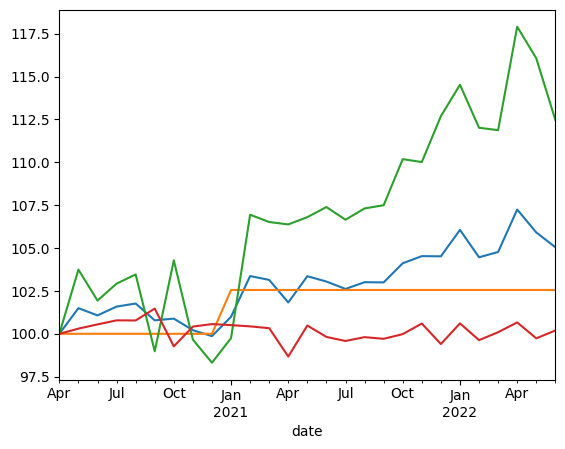

In [ ]:
mai_df.groupby(['date'])['MAI_composite'].mean().plot(kind = 'line')
mai_df.groupby(['date'])['infrastructure'].mean().plot(kind = 'line')
mai_df.groupby(['date'])['engagement'].mean().plot(kind = 'line')
mai_df.groupby(['date'])['participation'].mean().plot(kind = 'line')


<Axes: xlabel='state_name'>

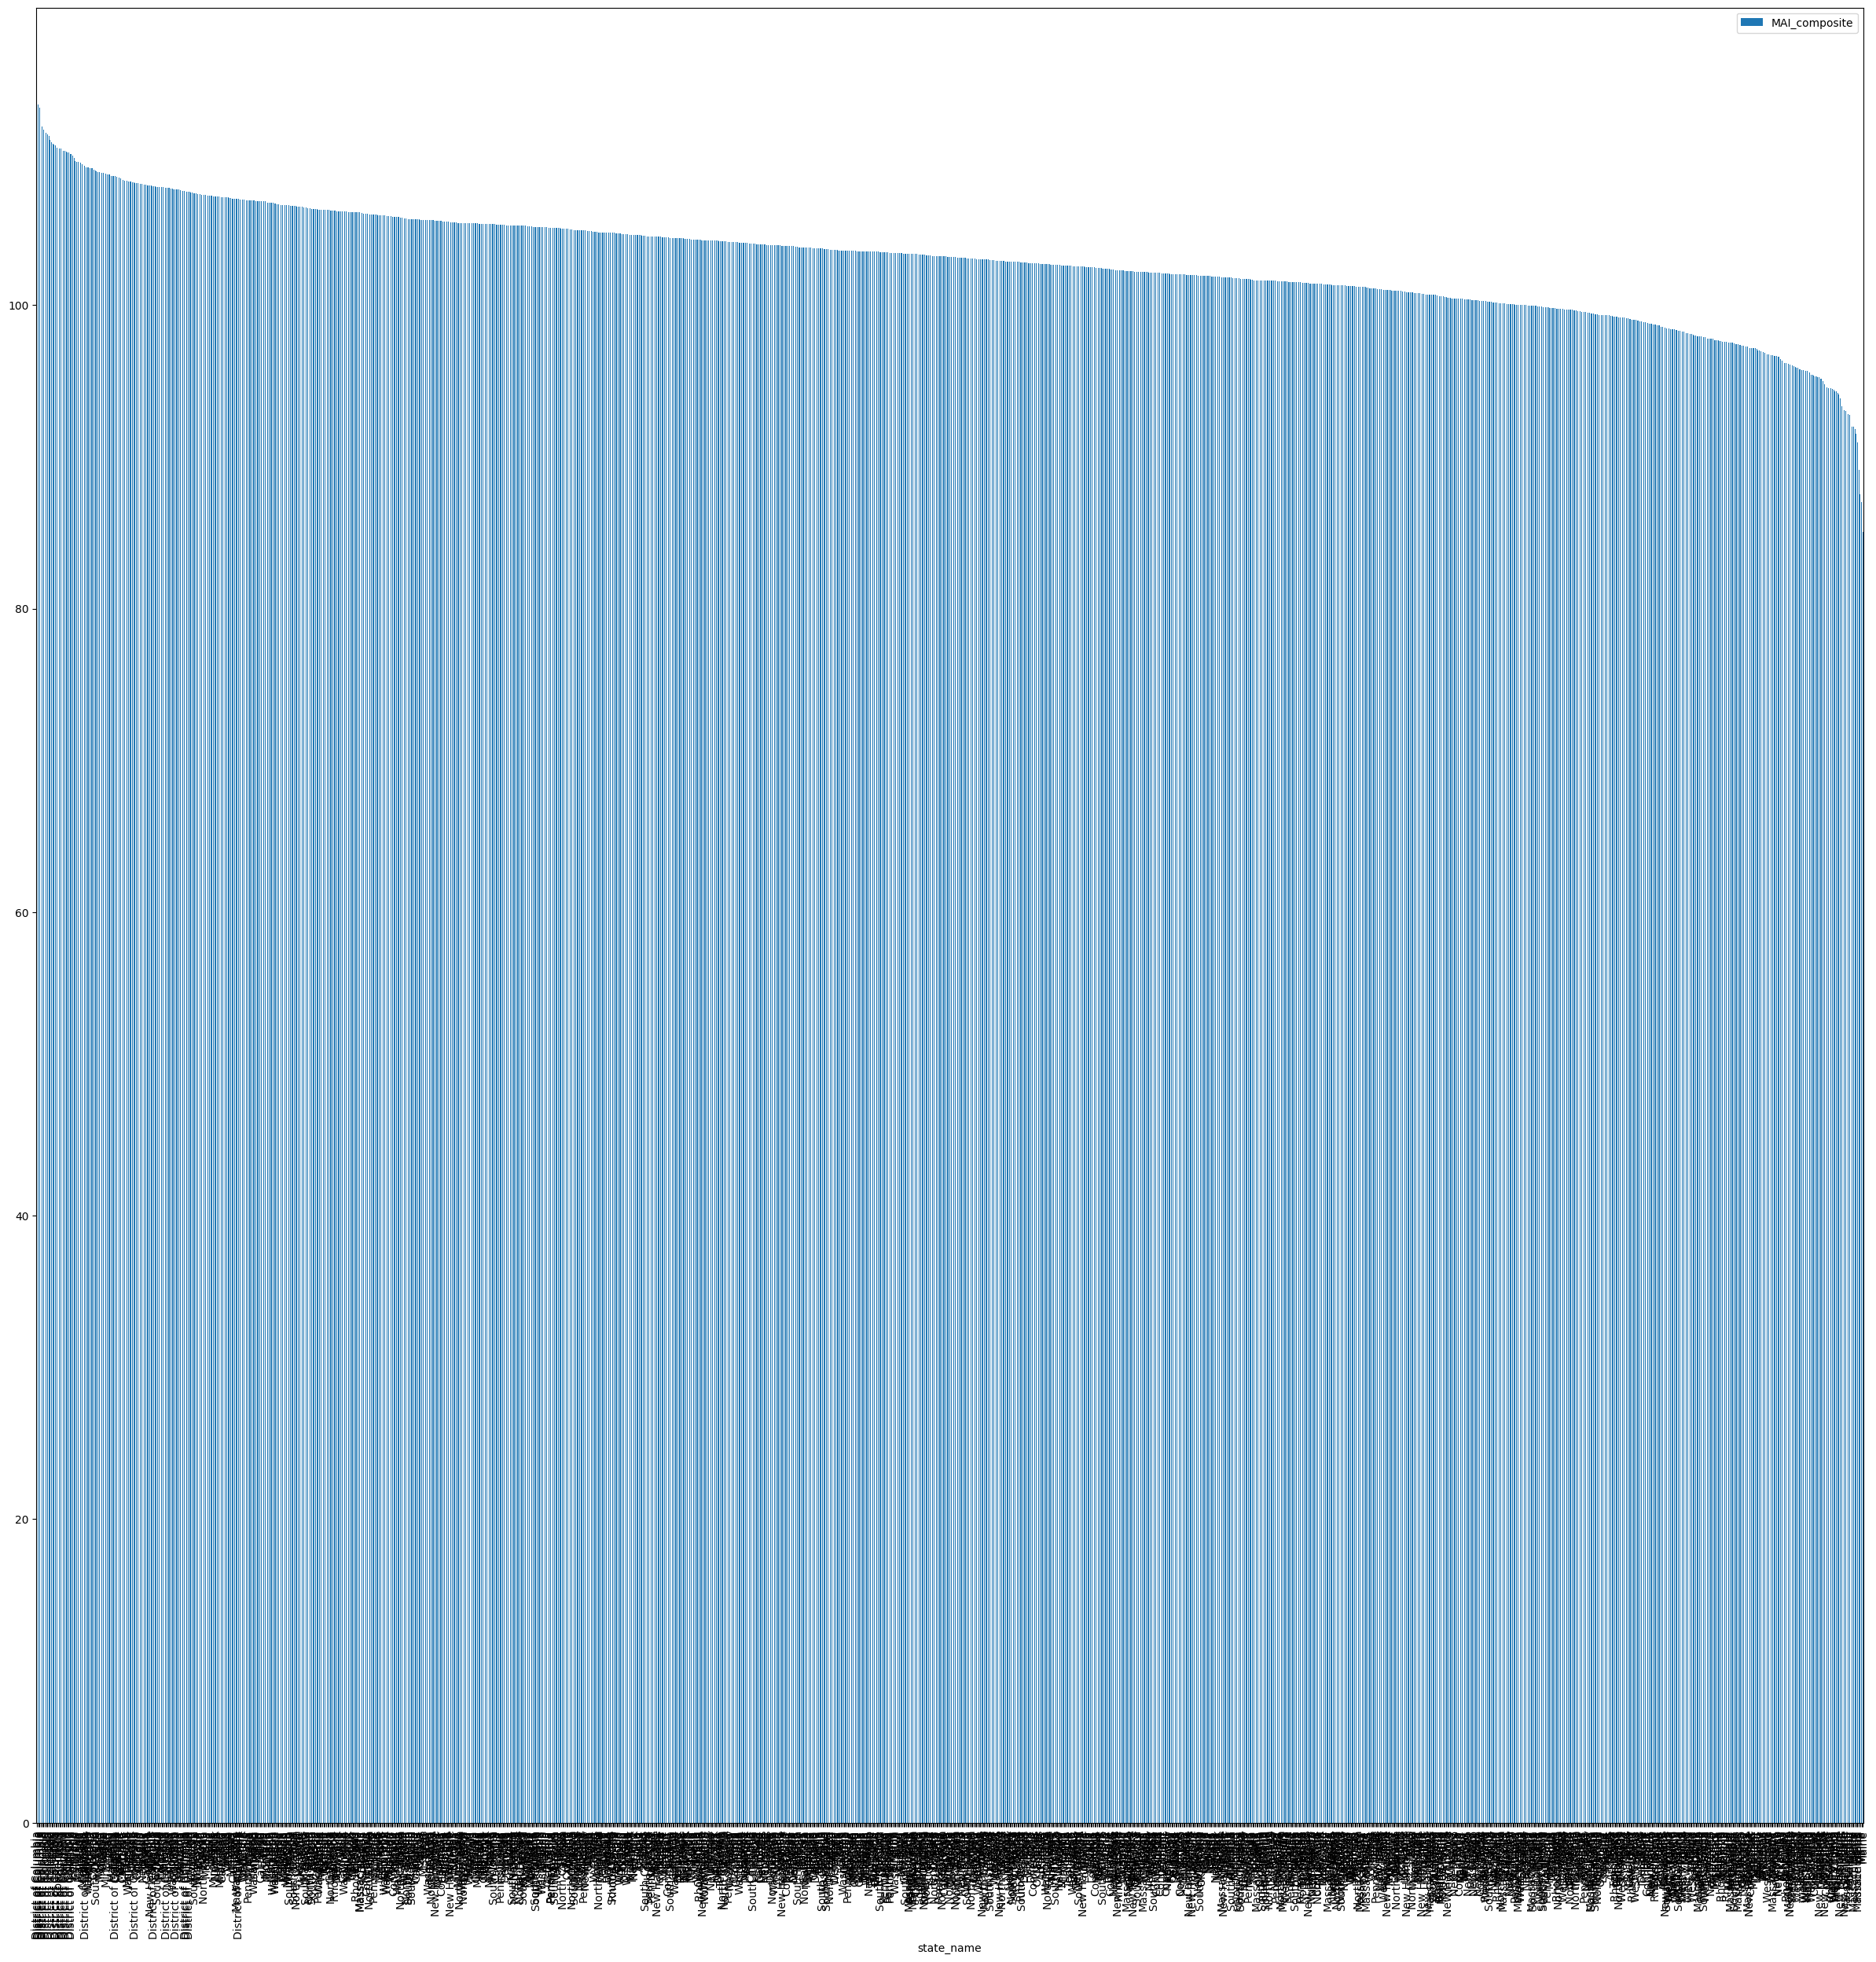

In [ ]:
mai_df.groupby(['state_name'])['MAI_composite'].sum()
mai_df.sort_values(['MAI_composite'], ascending=False).plot(kind='bar', y='MAI_composite', x='state_name',figsize= (30,30))



In [ ]:
grouped = mai_df.groupby('state_name')

# Correlation Analysis:

In this section we see the relationship between the different measures Microbusiness Activity Index composite, Engagement, Participation	and Infrastructure




In [ ]:
mai_df_subset = mai.iloc[0:70956, 3:8]
mai_df_subset

,state_name,total_pop_20,MAI_composite,engagement,participation
0,Alabama,5024279,95.15,99.00,96.98
1,Alaska,733391,102.11,99.50,100.37
2,Arizona,7151502,101.63,96.97,103.28
3,Arkansas,3011524,95.37,100.38,97.31
4,California,39538224,102.05,97.40,102.93
...,...,...,...,...,...
1372,Virginia,8631393,107.74,112.99,101.96
1373,Washington,7705281,106.67,109.17,101.71
1374,West Virginia,1793716,100.01,111.54,97.37
1375,Wisconsin,5893718,105.73,116.54,99.64


In [ ]:
corr_matrix = mai_df_subset.corr(method = 'pearson')
corr_matrix 

<ipython-input-28-f8ce34fc65f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = mai_df_subset.corr(method = 'pearson')


,total_pop_20,MAI_composite,engagement,participation
total_pop_20,1.000000,0.124588,-0.109989,0.258686
MAI_composite,0.124588,1.000000,0.498392,0.691929
engagement,-0.109989,0.498392,1.000000,-0.172525
participation,0.258686,0.691929,-0.172525,1.000000


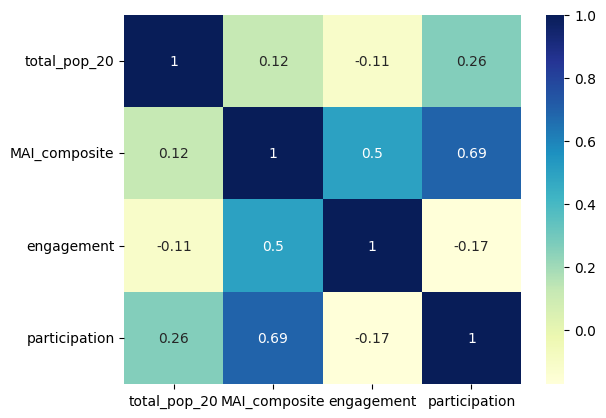

In [ ]:
import seaborn as sb
sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)

plt.show()